# Dynamical networks: dynamics of networks



Notebook for the 4th course of Big data CRI (2019). 

We use several libraries for this course:
`networkx`, `matplotlib`.


Importantly we will also create new classes and write new functions ourselves.

In [1]:
from collections import Counter
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap

#import watermark



Let us start with simple network on which we consider some processes.
We start with Erdos-Renyi graph.

In [25]:
#create new class Graph 

class Graph:
    def __init__(self, directed=False):
        self._nodes = {}
        self._edges = {}
        self._directed = directed

#adding methods to this class

def add_method(cls):
    def decorator(func):
        setattr(cls, func.__name__, func)
        return func
    return decorator

@add_method(Graph)
def add_node(self, node, **kwargs):
    self._nodes[node] = kwargs    
    
@add_method(Graph)
def add_nodes_from(self, nodes, **kwargs):
    for node in nodes:
        if isinstance(node, tuple):
            self._nodes[node[0]] = node[1:]
        else:
            self._nodes[node] = kwargs    
        
@add_method(Graph)
def nodes(self):
    return list(self._nodes.keys())        



@add_method(Graph)
def add_edge(self, node_i, node_j, **kwargs):
    if node_i not in self._nodes:
        self.add_node(node_i)
    
    if node_j not in self._nodes:
        self.add_node(node_j)
    
    if node_i not in self._edges:
        self._edges[node_i] = {}
        
    if node_j not in self._edges[node_i]:
        self._edges[node_i][node_j] = {}
        
    self._edges[node_i][node_j] = kwargs
    
    if not self._directed:
        if node_j not in self._edges:
            self._edges[node_j] = {}

        if node_i not in self._edges[node_j]:
            self._edges[node_j][node_i] = {}

        self._edges[node_j][node_i] = kwargs
        
        
@add_method(Graph)
def add_edges_from(self, edges, **kwargs):
    for edge in edges:
        self.add_edge(*edge, **kwargs)
        
        
@add_method(Graph)
def degree_distribution(self, normalize=True):
    deg = self.degrees()
    dist = Graph._build_distribution(deg, normalize)
    
    return dist      

@add_method(Graph)
def degrees(self):
    deg = {}
    
    for node in self._nodes:
        if node in self._edges:
            deg[node] =  len(self._edges[node])
        else:
            deg[node] = 0
    
    return deg


@add_method(Graph)
def _build_distribution(data, normalize=True):
    values = data.values()
    dist = list(Counter(values).items())
    dist.sort(key=lambda x:x[0])
    dist = np.array(dist, dtype='float')
           
    if normalize:
        norm = dist.T[1].sum()
        dist.T[1] /= norm
    
    return dist

# Different classes of networks

Importantly we can not just call networks from existing classes in ´networkx´ but also create these classes ourselves. Here we show examples from ER and Barabasi-Albert models. 

# Excercise 1 

Write class of network model yourself. Take any existing class in the library networkx.github.io/ 

In [30]:
#@add_method(Graph) # we can add methods to new class as in https://github.com/Dataforscience/networks


@add_method(Graph)
def erdos_renyi_graph(N, p):
    nodes = list(range(N))
    edges = []
    
    for i in range(N):
        for j in range(i+1, N):
            if np.random.random() < p:
                edges.append((i, j))
    
    G = Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    return G

@add_method(Graph)
def barabasi_albert_graph(N):
    G = Graph()

    nodes = range(N)
    G.add_nodes_from(nodes)

    edges = [0,1,1,2,2,0]

    for node_i in range(3, N):
        pos = np.random.randint(len(edges))
        node_j = edges[pos]

        edges.append(node_i)
        edges.append(node_j)

    edges = zip(nodes, edges[1::2])

    G.add_edges_from(edges)

    return G


# Properties of networks
We can now create classes to study properties of networks.

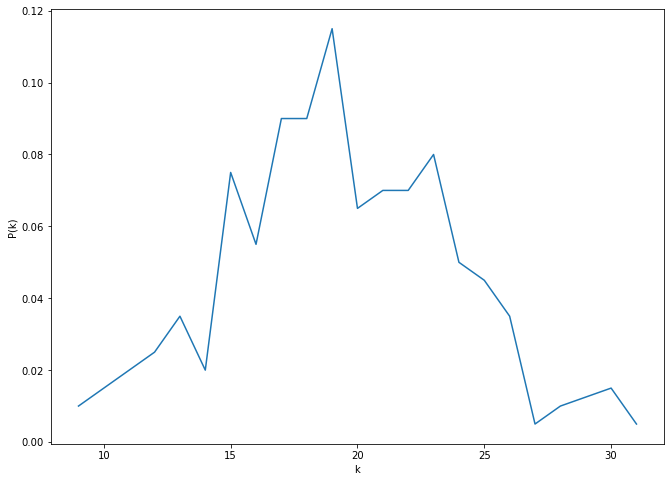

In [29]:
# we first start with looking at degree distributions

ER = Graph.erdos_renyi_graph(200, 0.1)
Pk = ER.degree_distribution()

plt.plot(Pk.T[0], Pk.T[1])
plt.xlabel('k')
plt.ylabel('P(k)')
plt.gcf().set_size_inches(11, 8)


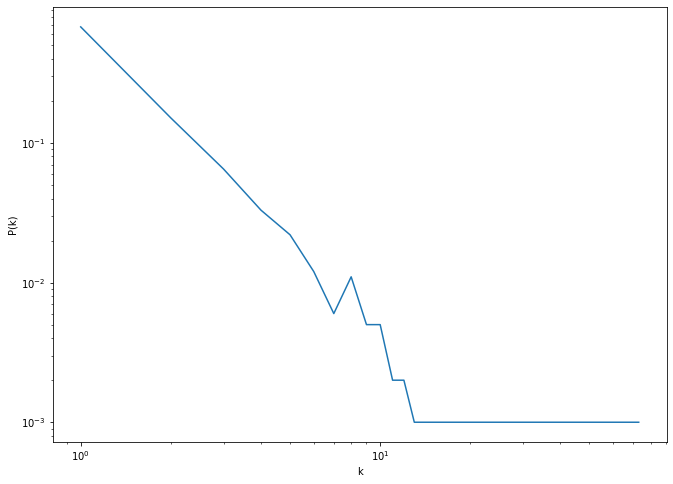

In [32]:
BA = Graph.barabasi_albert_graph(1000)
Pk = BA.degree_distribution()

plt.loglog(Pk.T[0], Pk.T[1])
plt.xlabel('k')
plt.ylabel('P(k)')
plt.gcf().set_size_inches(11, 8)

In [34]:
# in order to use network properties in other notebooks


def export_class(path, filename):
    import io
    from nbformat import read

    with io.open(path, 'r', encoding='utf-8') as f:
        nb = read(f, 4)

    fp = open(filename, "wt")

    for cell in nb.cells:
        if cell.cell_type == 'code':
            first_line = cell.source.split('\n')[0]
            
            if "class " in first_line or "add_method" in first_line:
                print(cell.source, file=fp)

                print("\n", file=fp)
            elif "import" in first_line:
                for line in cell.source.split('\n'):
                    if not line.startswith("%"):
                        print(line.strip(), file=fp)
                        
                print("\n", file=fp)

    fp.close()
    
    
#we export Graph class to use it in other notebooks # see Love to Jupyter    
export_class('dynamical_networks.ipynb', 'Graph.py')    